# Time Series Project

En la primera etapa nos ocupamos de cargar los datos

# CARGANDO EL DATASET

In [39]:
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

from paquete_proyecto.iniciando.bases import importar_databases
from paquete_proyecto.herramientas.data_info import data_info

In [40]:
ventas, ventas_sin_duplicados = importar_databases()

La longitud de la serie Nº 3 es de: 127255
La longitud de la serie Nº 4 es de: 108794


In [41]:
# cantidad de dias que faltan
127979 - 127255

724

In [42]:
display(ventas.sample(3))
data_info(ventas, "ventas")

,IdCliente,NombreCliente,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area
Fecha,,,,,,,,,,,,
2019-09-20,C860040576,COLTANQUES SAS,24.0,SE-GF-1-0001,ALINEACION,106.0,SERVICIOS,1,20034,Puente aranda,Calle 13,35.0
2019-02-08,C900102769,PACOLI S.A,45.0,SE-CS-1-0008,X,106.0,SERVICIOS,1,67227,Barrios unidos,Av Chile,34.0
2019-03-19,C890211325,TRANSPORTES CALDERON SA,27.0,LL-TCC-0061,LATITUDE TOUR HP 215/65R16,101.0,LLANTA,4,1284033,Barrios unidos,Av Chile,34.0


info de ventas,columna,type,count,NaN,NaN_pct,unique,unique_pct
0,IdCliente,object,127255,0,0.0 %,24122,18.96 %
1,NombreCliente,object,127255,0,0.0 %,21840,17.16 %
2,Empleado,float64,127255,0,0.0 %,56,0.04 %
3,Referencia,object,127255,0,0.0 %,1854,1.46 %
4,Descripcion,object,127255,0,0.0 %,1814,1.43 %
5,CodigoFamilia,float64,127255,0,0.0 %,5,0.0 %
6,Familia,object,127255,0,0.0 %,5,0.0 %
7,Cantidad,object,127255,0,0.0 %,213,0.17 %
8,Ventas,object,127255,0,0.0 %,14279,11.22 %
9,Localidad,object,127255,0,0.0 %,6,0.0 %


<div>
    <h4>Evaluación de cada columna</h4>
    <ol>
        <li> <b>IdCliente</b>: object - código alfanumérico</li><br />
        <li> <b>NombreCliente</b>: object - string = Nombre, Apellido</li><br />
        <li> <b>>> Empleado</b>: float - cambiar a int</li><br />
        <li> <b>Referencia</b>: object: categoría ordinal</li><br />
        <li> <b>Descripcion</b>: object: categoria cualitativa </li><br />
        <li> <b>>> CodigoFamilia</b>: float64: Cambiar a int</li><br />
        <li> <b>Familia</b>: object: categoria cualitativa</li><br />
        <li> <b>>>Cantidad</b>: object: cambiar a int</li><br />
        <li> <b>>> Ventas</b>: int: cambiar a float</li><br />
        <li> <b>Localidad</b>: object: categoria bussines</li><br />
        <li> <b>>> Area</b>: float: cambiar a int</li><br />
    </ol>
</div>

In [43]:
from paquete_proyecto.iniciando.variables import ajustar_tipos

In [44]:
ventas, ventas_sin_duplicados = ajustar_tipos(ventas), ajustar_tipos(ventas_sin_duplicados)

# CREANDO LAS REPRESENTACIONES TEMPORALES
Para cada una de las variables, debería haber una representación temporal, en el que cada registro represente una día unicamente

In [45]:
# crear una pivot table. que en el indice tenga fechas, en las columnas tenga localidad, y que los valores sean la cantidad de clientes que tuvo.

pd.pivot_table(ventas, values="IdCliente", index="Fecha", columns="Localidad", aggfunc="count")

Localidad,Barrios unidos,Bogota,Engativa,Puente aranda,Suba,Usaquen
Fecha,,,,,,
2016-01-09,7.0,16.0,68.0,11.0,19.0,11.0
2016-01-10,6.0,19.0,37.0,4.0,22.0,8.0
2016-01-11,7.0,17.0,100.0,29.0,13.0,5.0
2016-01-12,5.0,14.0,107.0,5.0,17.0,12.0
2016-02-09,3.0,1.0,46.0,33.0,11.0,7.0
...,...,...,...,...,...,...
2020-10-02,5.0,17.0,79.0,11.0,13.0,NaN
2020-10-03,3.0,NaN,41.0,20.0,16.0,8.0
2020-11-01,2.0,2.0,49.0,12.0,14.0,9.0


In [46]:
# crear una pivot table como la anterior, que en los values tenga cantidad de empleados
pd.pivot_table(ventas, values="Empleado", index="Fecha", columns="Localidad", aggfunc="count")

print ('Al parecer por cada transacción hay un empleado, no hay 2 transacciones realizadas por el mismo empleado en 1 dia')

Al parecer por cada transacción hay un empleado, no hay 2 transacciones realizadas por el mismo empleado en 1 dia


In [47]:
ventas.Familia.unique()

array(['LLANTA', 'SERVICIOS', 'REENCAUCHE', 'LUBRICANTES', 'FILTROS'],
      dtype=object)

# COMPLETANDO EL DATASET

Primero tenemos que armar cada una de las series temporales

Para poder aplicar Cross-Validation a la serie temporal, es necesario completar con las fechas faltantes con algun valor default en sus variables. De esta forma podremos garantizar que nuestro folds representan el mismo timedelta.

In [48]:
start_date = ventas.index.min()
end_date = ventas.index.max()

date_range = pd.date_range(start=start_date, end=end_date)
date_range

## HAY QUE TOMAR UN CRITERIO DE UNIFICACION DEL DATASET VENTAS: MIRAR TEST_2
## Primero analizar que información se pierde al hacer un sum(ventas), y luego recuperar esa información con pivot-tables
# df2 = ventas.reindex(date_range).fillna(0.0).rename_axis('Fecha').reset_index()
# df2


DatetimeIndex(['2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-16',
               '2016-01-17', '2016-01-18',
               ...
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-30',
               '2020-12-01', '2020-12-02'],
              dtype='datetime64[ns]', length=1790, freq='D')

# ARMANDO MUESTREOS TEMPORALES

Vamos a hacer cross validation con scikit learn sobre un DataFrame de prueba

In [49]:
muestra = pd.DataFrame([0.0 for i in range(len(date_range))], index=date_range, columns=['default'])
muestra.index.name = "Fecha"
muestra

,default
Fecha,
2016-01-09,0.0
2016-01-10,0.0
2016-01-11,0.0
2016-01-12,0.0
2016-01-13,0.0
...,...
2020-11-28,0.0
2020-11-29,0.0
2020-11-30,0.0


In [50]:
from sklearn.model_selection import TimeSeriesSplit

In [51]:
# Son 1790 / 30 = 59,66 días por fold
# k = 29
# splitter = TimeSeriesSplit(n_splits=k)
splitter = TimeSeriesSplit(n_splits=29, max_train_size=60, test_size=60)

In [52]:
train = []
test = [] #only purpouse is to extract last element
for train_index, test_index in splitter.split(muestra.index):
    concat_index, predict_index = muestra.index[train_index], muestra.index[test_index]
    train.append(muestra.loc[concat_index])
    test.append(muestra.loc[predict_index])

# train.append(test[-1])

In [53]:
test[0]
len(train[3])
test[-1]
train[0]
len(train)

29

In [54]:
print (train[0].index.min())
print (train[0].index.max())

2016-01-09 00:00:00
2016-02-27 00:00:00


In [55]:
print (train[1].index.min())
print (train[1].index.max())

2016-02-28 00:00:00
2016-04-27 00:00:00


In [56]:
print (train[2].index.min())
print (train[2].index.max())

2016-04-28 00:00:00
2016-06-26 00:00:00


In [57]:
print (train[3].index.min())
print (train[3].index.max())

2016-06-27 00:00:00
2016-08-25 00:00:00


In [58]:
print (train[4].index.min())
print (train[4].index.max())

2016-08-26 00:00:00
2016-10-24 00:00:00


In [59]:
print (train[5].index.min())
print (train[5].index.max())

2016-10-25 00:00:00
2016-12-23 00:00:00


In [60]:
print (train[-1].index.min())
print (train[-1].index.max())

2020-08-05 00:00:00
2020-10-03 00:00:00


In [61]:
print (test[-1].index.min())
print (test[-1].index.max())

2020-10-04 00:00:00
2020-12-02 00:00:00


In [62]:
train.append(test[-1])

# Obteniendo muestras bimensuales

Por más que no hay unido los valores díarios en un solo valor por día, voy a intentar aislar todas las fechas

In [63]:
# seleccion de fechas
fechas = train[0].index 

fechas
# ventas.loc[fechas] # hay fechas que no están en el index

DatetimeIndex(['2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-16',
               '2016-01-17', '2016-01-18', '2016-01-19', '2016-01-20',
               '2016-01-21', '2016-01-22', '2016-01-23', '2016-01-24',
               '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
               '2016-01-29', '2016-01-30', '2016-01-31', '2016-02-01',
               '2016-02-02', '2016-02-03', '2016-02-04', '2016-02-05',
               '2016-02-06', '2016-02-07', '2016-02-08', '2016-02-09',
               '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-13',
               '2016-02-14', '2016-02-15', '2016-02-16', '2016-02-17',
               '2016-02-18', '2016-02-19', '2016-02-20', '2016-02-21',
               '2016-02-22', '2016-02-23', '2016-02-24', '2016-02-25',
               '2016-02-26', '2016-02-27'],
              dtype='datetime64[ns]', name='Fecha', freq=None)

In [65]:
## Fechas que faltan: [Timestamp('2016-01-13 00:00:00'), Timestamp('2016-01-14 00:00:00'), Timestamp('2016-01-15 00:00:00')

pd.merge(ventas.reset_index(), muestra.reset_index(), on="Fecha", how="right").iloc[550:600]

ventas_2 = pd.merge(ventas.reset_index(), muestra.reset_index(), on="Fecha", how="right")
ventas_2.set_index("Fecha", inplace=True)

[Text(0.5, 1.0, 'Cantidad de ventas bimensuales')]

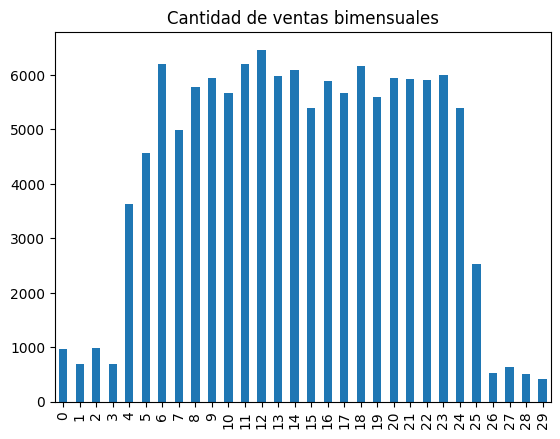

In [81]:
# seleccion de fechas
datasets_bimensuales = []

for indice in range(len(train)):
    fechas = train[indice].index 
    datasets_bimensuales.append(ventas_2.loc[fechas].dropna()) # hay fechas que no están en el index

longitud = []
for elemento in datasets_bimensuales:
    # print (len(elemento))
    longitud.append(len(elemento))

pd.Series(longitud).plot.bar().set(title='Cantidad de ventas bimensuales')

In [ ]:
ventas_2

,Fecha,IdCliente,NombreCliente,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area,default
0,2016-01-09,C1070956433,PINTO JOHN,24.0,LL-2R-0038,PILOT STREET 110/80-17,101.0,LLANTA,1.0,129310.0,Puente aranda,Calle 13,35.0,0.0
1,2016-01-09,C19347046,RUIZ LUIS FERNANDO,10.0,SE-CS-2-0001,BALANCEO AUTO,106.0,SERVICIOS,4.0,31035.0,Engativa,Calle 80,31.0,0.0
2,2016-01-09,C800232717,CORSO Y CIA S EN C,10.0,SE-CS-2-0002,BALANCEO CAMIONETA,106.0,SERVICIOS,4.0,31034.0,Engativa,Calle 80,31.0,0.0
3,2016-01-09,C79523685,GONZALEZ JUAN CARLOS,10.0,SE-CS-2-0002,BALANCEO CAMIONETA,106.0,SERVICIOS,4.0,31034.0,Engativa,Calle 80,31.0,0.0
4,2016-01-09,C800214037,EXPRESER SAS,5.0,REB-0063,REENC XZE1 235/75R17.5,102.0,REENCAUCHE,1.0,29892.0,Engativa,Ventas externas,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127974,2020-12-02,C17050457,GAMBOA PAEZ JOSE MARIO,44.0,SE-CS-1-0001,ALINEACION AUTO,106.0,SERVICIOS,1.0,37815.0,Engativa,Calle 80,31.0,0.0
127975,2020-12-02,C51590721,DAZA MIRIAM,44.0,SE-CS-1-0006,ALINEACION BUS,106.0,SERVICIOS,1.0,37815.0,Engativa,Calle 80,31.0,0.0
127976,2020-12-02,C860517112,TRANSPORTES ESPECIALES COLEGIOS Y TURISMO SA,50.0,SE-CS-1-0005,ALINEACION BUSETA O CAMION LIVIANO,106.0,SERVICIOS,1.0,37815.0,Puente aranda,Calle 13,35.0,0.0
127977,2020-12-02,C900315569,VOLVO GROUP COLOMBIA SAS,29.0,SE-CT-1-0003,ALINEACION 3 EJES / CT,106.0,SERVICIOS,1.0,120000.0,Engativa,Ventas externas,22.0,0.0
